In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd

import fair
from matplotlib import pyplot as plt
from fair.forward2 import fair_scm
from fair.forward import fair_scm
from fair.forward3 import fair_scm

In [2]:
SSPs = pd.read_csv("/Users/michelledvorak/Documents/2020 RA'ship/rcmip-emissions-annual-means-v4-0-0.csv")

In [3]:
CO2 = SSPs['Unit'].str.contains('CO2')
SSPs = SSPs[CO2]

In [4]:
SSP_only = SSPs['Scenario'].str.contains('ssp')
SSPs = SSPs[SSP_only]

In [5]:
CO2_extras = SSPs['Variable'].str.contains('MAGICC')
SSPs = SSPs[~CO2_extras]

In [6]:
del SSPs['Region']

In [7]:
del SSPs['Activity_Id']
del SSPs['Mip_Era']

average_emissions = SSPs.groupby('Scenario').mean()

In [8]:
#average_emissions

In [9]:
average_emissions = average_emissions.T
# average_emissions

In [10]:
SSPs_historical = average_emissions.copy()
#SSPs_historical

In [11]:
del SSPs_historical['ssp370-lowNTCF-aerchemmip']
del SSPs_historical['ssp370-lowNTCF-gidden']

# SSPs_historical

In [12]:
SSPs_historical.loc[:,:].replace(0., np.nan, inplace=True)


In [13]:
SSPs_historical.loc[:,'Year'] = SSPs_historical.index

In [14]:
SSPs_historical.loc[:,'Year'] = SSPs_historical.loc[:,'Year'].astype(int)

In [15]:
SSPs_historical.drop(SSPs_historical[SSPs_historical.Year < 1880].index, inplace=True)
SSPs_historical.drop(SSPs_historical[SSPs_historical.Year > 2160].index, inplace=True)

In [16]:
SSPs_historical.loc[:,'Year'] = pd.to_datetime(SSPs_historical['Year'], format='%Y')

In [17]:
SSPs_historical.index = SSPs_historical['Year']
SSPs_historical = SSPs_historical.resample('Y').mean()

In [18]:
SSPs_historical['ssp119'] = SSPs_historical['ssp119'].interpolate()
SSPs_historical['ssp126'] = SSPs_historical['ssp126'].interpolate()
SSPs_historical['ssp245'] = SSPs_historical['ssp245'].interpolate()
SSPs_historical['ssp370'] = SSPs_historical['ssp370'].interpolate()
SSPs_historical['ssp434'] = SSPs_historical['ssp434'].interpolate()
SSPs_historical['ssp460'] = SSPs_historical['ssp460'].interpolate()
SSPs_historical['ssp534-over'] = SSPs_historical['ssp534-over'].interpolate()
SSPs_historical['ssp585'] = SSPs_historical['ssp585'].interpolate()

In [19]:
SSP1_19 = np.array(SSPs_historical['ssp119'])/1000
SSP1_26 = np.array(SSPs_historical['ssp126'])/1000
SSP2_45 = np.array(SSPs_historical['ssp245'])/1000
SSP3_70 = np.array(SSPs_historical['ssp370'])/1000
SSP4_34 = np.array(SSPs_historical['ssp434'])/1000
SSP4_60 = np.array(SSPs_historical['ssp460'])/1000
SSP5_34 = np.array(SSPs_historical['ssp534-over'])/1000
SSP5_85 = np.array(SSPs_historical['ssp585'])/1000

In [20]:
other_rf = np.zeros(SSP1_19.size)

C119, F119, T119 = fair.forward.fair_scm(emissions=SSP1_19, other_rf=other_rf, useMultigas=False)
C126, F126, T126 = fair.forward.fair_scm(emissions=SSP1_26, other_rf=other_rf, useMultigas=False)
C245, F245, T245 = fair.forward.fair_scm(emissions=SSP2_45, other_rf=other_rf, useMultigas=False)
C370, F370, T370 = fair.forward.fair_scm(emissions=SSP3_70, other_rf=other_rf, useMultigas=False)
C434, F434, T434 = fair.forward.fair_scm(emissions=SSP4_34, other_rf=other_rf, useMultigas=False)
C460, F460, T460 = fair.forward.fair_scm(emissions=SSP4_60, other_rf=other_rf, useMultigas=False)
C534, F534, T534 = fair.forward.fair_scm(emissions=SSP5_34, other_rf=other_rf, useMultigas=False)
C585, F585, T585 = fair.forward.fair_scm(emissions=SSP5_85, other_rf=other_rf, useMultigas=False)

C119_2, F119_2, T119_2, _ = fair.forward3.fair_scm(emissions=SSP1_19, eps=1.28, gam=0.67, other_rf=other_rf, useMultigas=False)
C126_2, F126_2, T126_2, _ = fair.forward3.fair_scm(emissions=SSP1_26, eps=1.28, gam=0.67, other_rf=other_rf, useMultigas=False)
C245_2, F245_2, T245_2, _ = fair.forward3.fair_scm(emissions=SSP2_45, eps=1.28, gam=0.67, other_rf=other_rf, useMultigas=False)
C370_2, F370_2, T370_2, _ = fair.forward3.fair_scm(emissions=SSP3_70, eps=1.28, gam=0.67, other_rf=other_rf, useMultigas=False)
C434_2, F434_2, T434_2, _ = fair.forward3.fair_scm(emissions=SSP4_34, eps=1.28, gam=0.67, other_rf=other_rf, useMultigas=False)
C460_2, F460_2, T460_2, _ = fair.forward3.fair_scm(emissions=SSP4_60, eps=1.28, gam=0.67, other_rf=other_rf, useMultigas=False)
C534_2, F534_2, T534_2, _ = fair.forward3.fair_scm(emissions=SSP5_34, eps=1.28, gam=0.67, other_rf=other_rf, useMultigas=False)
C585_2, F585_2, T585_2, _ = fair.forward3.fair_scm(emissions=SSP5_85, eps=1.28, gam=0.67, other_rf=other_rf, useMultigas=False)

initial temperature anomaly equals: 0.0010161544427073619
initial temperature anomaly equals: 0.0010161544427073619
initial temperature anomaly equals: 0.0010161544427073619
initial temperature anomaly equals: 0.0010161544427073619
initial temperature anomaly equals: 0.0010161544427073619
initial temperature anomaly equals: 0.0010161544427073619
initial temperature anomaly equals: 0.0010161544427073619
initial temperature anomaly equals: 0.0010161544427073619
initial temperature anomaly for Geo V2 is: 0.0010161544427073619
initial temperature anomaly for Geo V2 is: 0.0010161544427073619
initial temperature anomaly for Geo V2 is: 0.0010161544427073619
initial temperature anomaly for Geo V2 is: 0.0010161544427073619
initial temperature anomaly for Geo V2 is: 0.0010161544427073619
initial temperature anomaly for Geo V2 is: 0.0010161544427073619
initial temperature anomaly for Geo V2 is: 0.0010161544427073619
initial temperature anomaly for Geo V2 is: 0.0010161544427073619


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Temperature anomaly (K)')

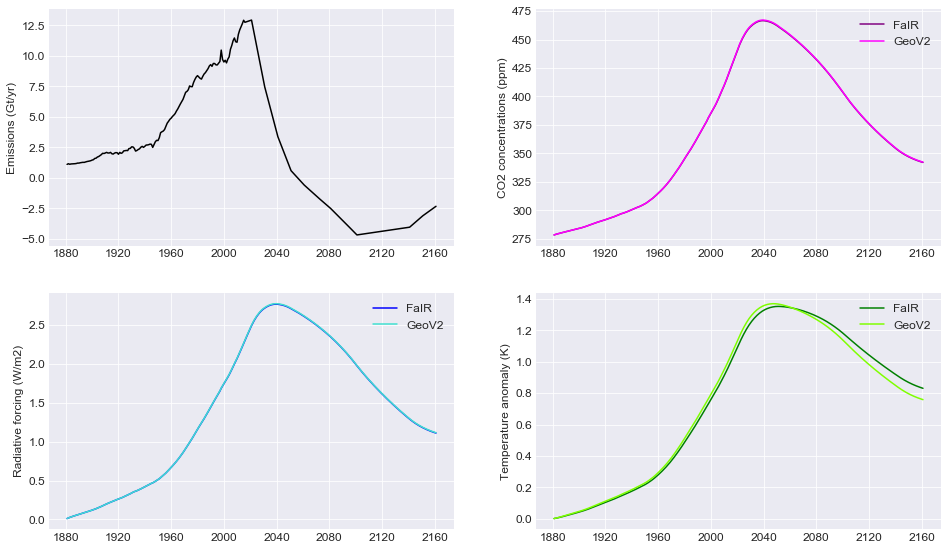

In [21]:
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 20)

fig = plt.figure()
ax1 = fig.add_subplot(421)
ax1.plot(SSPs_historical.index, SSP1_19, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSPs_historical.index, C119, color='purple', label='FaIR')
ax2.plot(SSPs_historical.index, C119_2, color='magenta', label='GeoV2')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSPs_historical.index, F119, color='blue', label='FaIR')
ax3.plot(SSPs_historical.index, F119_2, color='turquoise', label='GeoV2')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSPs_historical.index, T119, color='green', label='FaIR')
ax4.plot(SSPs_historical.index, T119_2, color='chartreuse', label='GeoV2')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')

Text(0, 0.5, 'Temperature anomaly (K)')

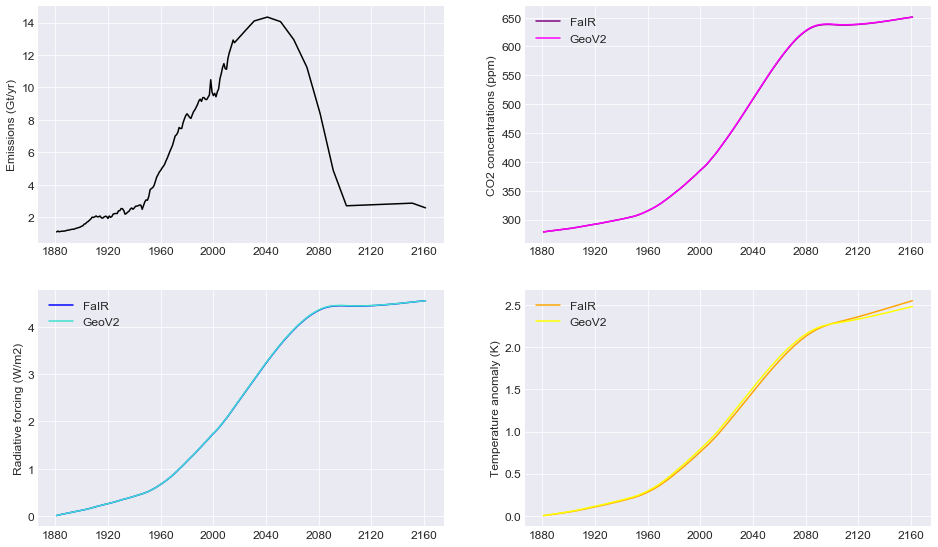

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(421)
ax1.plot(SSPs_historical.index, SSP2_45, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSPs_historical.index, C245, color='purple', label='FaIR')
ax2.plot(SSPs_historical.index, C245_2, color='magenta', label='GeoV2')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSPs_historical.index, F245, color='blue', label='FaIR')
ax3.plot(SSPs_historical.index, F245_2, color='turquoise', label='GeoV2')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSPs_historical.index, T245, color='orange', label='FaIR')
ax4.plot(SSPs_historical.index, T245_2, color='yellow', label='GeoV2')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')

Text(0, 0.5, 'Temperature anomaly (K)')

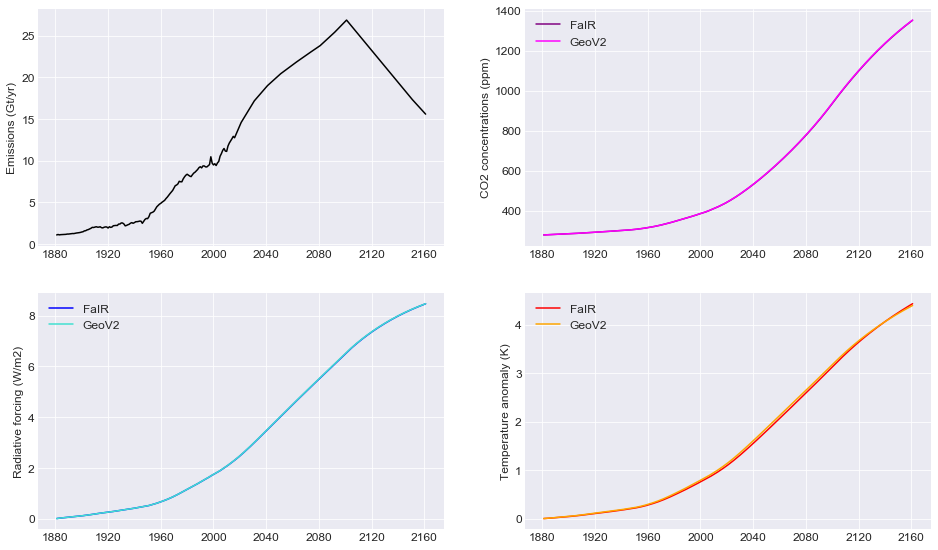

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(421)
ax1.plot(SSPs_historical.index, SSP3_70, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSPs_historical.index, C370, color='purple', label='FaIR')
ax2.plot(SSPs_historical.index, C370_2, color='magenta', label='GeoV2')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSPs_historical.index, F370, color='blue', label='FaIR')
ax3.plot(SSPs_historical.index, F370_2, color='turquoise', label='GeoV2')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSPs_historical.index, T370, color='red', label='FaIR')
ax4.plot(SSPs_historical.index, T370_2, color='orange', label='GeoV2')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')

Text(0, 0.5, 'Temperature anomaly (K)')

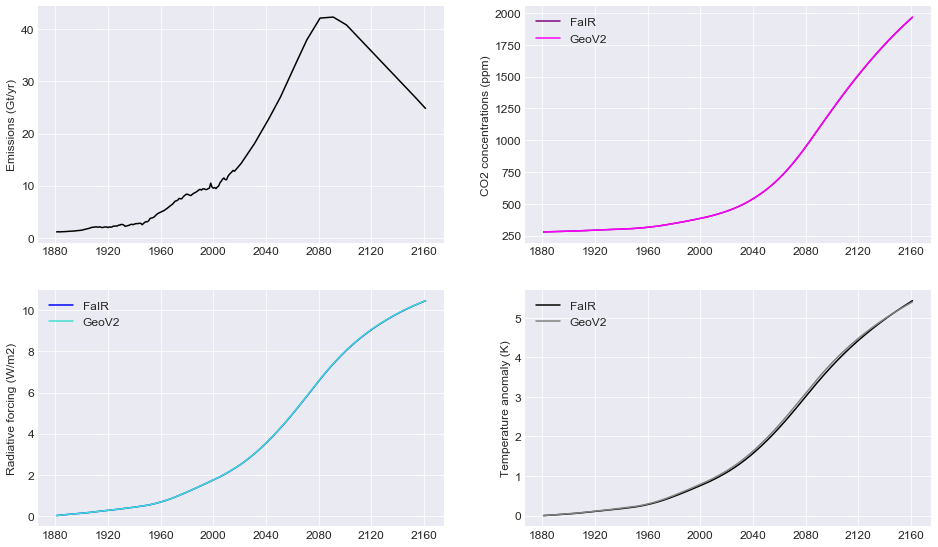

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(421)
ax1.plot(SSPs_historical.index, SSP5_85, color='black')
ax1.set_ylabel('Emissions (Gt/yr)')
ax2 = fig.add_subplot(422)
ax2.plot(SSPs_historical.index, C585, color='purple', label='FaIR')
ax2.plot(SSPs_historical.index, C585_2, color='magenta', label='GeoV2')
ax2.legend()
ax2.set_ylabel('CO2 concentrations (ppm)')
ax3 = fig.add_subplot(423)
ax3.plot(SSPs_historical.index, F585, color='blue', label='FaIR')
ax3.plot(SSPs_historical.index, F585_2, color='turquoise', label='GeoV2')
ax3.legend()
ax3.set_ylabel('Radiative forcing (W/m2)')
ax4 = fig.add_subplot(424)
ax4.plot(SSPs_historical.index, T585, color='black', label='FaIR')
ax4.plot(SSPs_historical.index, T585_2, color='grey', label='GeoV2')
ax4.legend()
ax4.set_ylabel('Temperature anomaly (K)')